# Dataset can be downloaded from Kaggle: https://www.kaggle.com/pankajy/admission-prediction

# Project:
## Selecting and Building a Machine Learning Model for this DataFrame.

In [131]:
# Importing necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV,LinearRegression
import statsmodels.api as sta
import pickle

%matplotlib inline

In [132]:
# Loading and reading the Dataset
data=pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [133]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [134]:
data.shape # Dataset has 500 Roas and 9 Columns

(500, 9)

In [135]:
data.info()
# No Categorical features to convert. Data type looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [136]:
# Checking NULL Values
data.isnull().sum()
# No Null Values to handle

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [137]:
# Sorting out columns for X and Y axis and dropping unnecesary columns
# We do not need SERIAL NUMBER feature in this case, so lets drop it.
data.drop('Serial No.', axis=1, inplace=True)

In [138]:
data.head() # Serial No. Dropped

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [139]:
y = data['Chance of Admit '] # Taking on Y axis

In [140]:
x=data.drop('Chance of Admit ', axis=1) # Taking X Axis by dropping the y axis from x

In [141]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [142]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

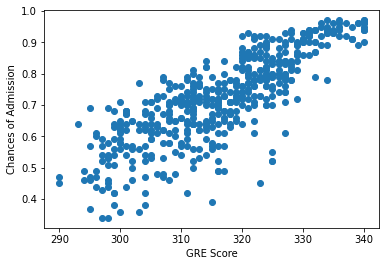

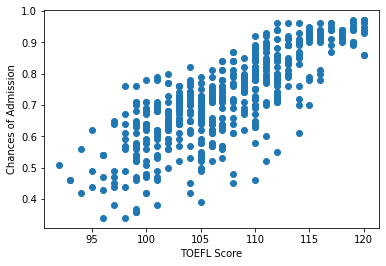

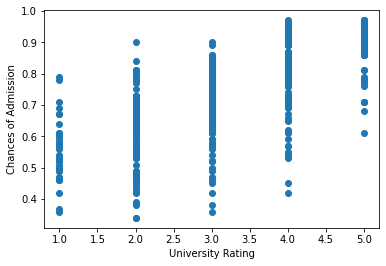

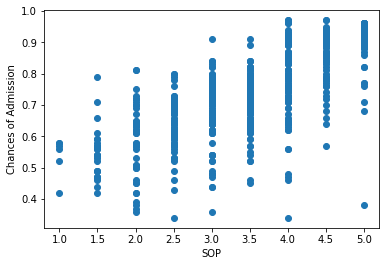

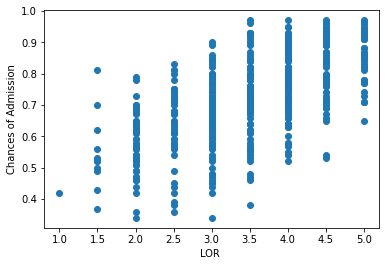

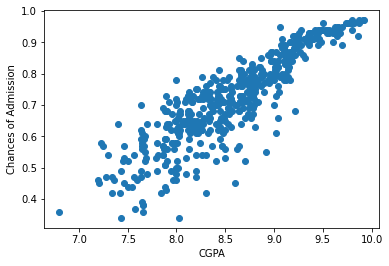

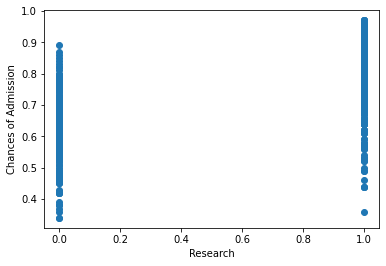

In [143]:
# Visualizing the Data to understand the representation using Scatter Plots:
for col in x.columns:
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel('Chances of Admission')
    plt.show()

In [144]:
# From Scatter Plots, the data looks good for Linear Regression, Now lets see the Bar Plots:

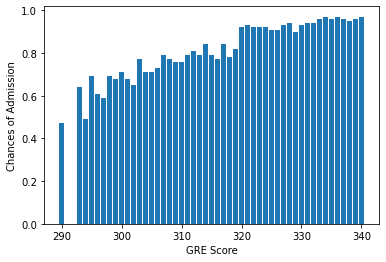

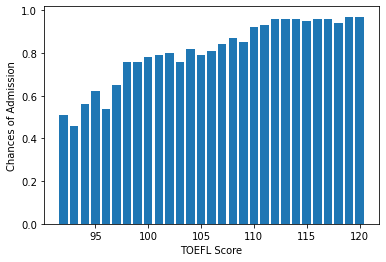

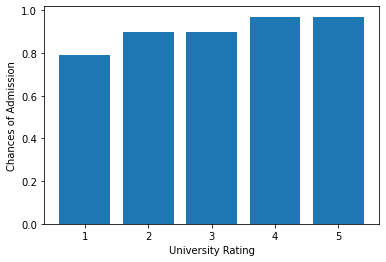

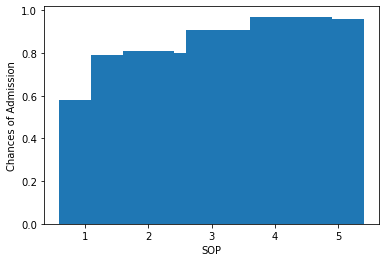

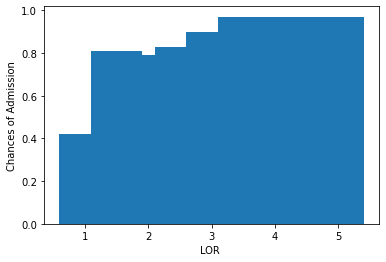

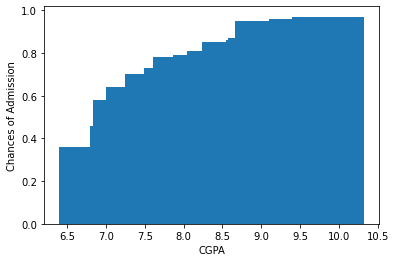

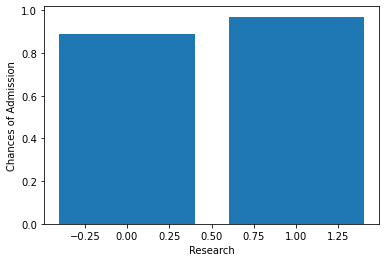

In [145]:
for col in x.columns:
    plt.bar(x[col], y)
    plt.xlabel(col)
    plt.ylabel('Chances of Admission')
    plt.show()

In [146]:
# Bar plots also show the data good for Linear Regression.

# Observations:
### Relationship between dependent and independent variables look Linear: Applying Linear Regression Model.

In [147]:
# Lets check the Multicolinearity by using VIF:

X_scaled=StandardScaler().fit_transform(x)

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = X_scaled

In [149]:
# Creating new Dataframe that will have all VIFs
vif = pd.DataFrame()

In [150]:
vif['VIF'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

In [151]:
vif

,VIF
0,4.464249
1,3.904213
2,2.621036
3,2.835210
4,2.033555
5,4.777992
6,1.494008


In [152]:
vif['Features'] = x.columns # Adding columns into VIF

In [153]:
vif

,VIF,Features
0,4.464249,GRE Score
1,3.904213,TOEFL Score
2,2.621036,University Rating
3,2.835210,SOP
4,2.033555,LOR
5,4.777992,CGPA
6,1.494008,Research


In [154]:
# As VIF is less than 5. we are not severe with Multicolinearity and good to go

In [155]:
# Now lets Divide the Data into Train and test
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

<IPython.core.display.Javascript object>

In [156]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit , Length: 375, dtype: float64

In [157]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [158]:
# Model is Trained, lets save the Model into Pickle file:
filename = 'finalized_Admission_model.pickle'
pickle.dump(regression,open(filename, 'wb'))

In [159]:
# Now lets run the Prediction on our Model:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [168]:
regression.predict(scaler.transform([[300, 110, 5, 5, 5, 10, 1]]))

array([0.91275546])

In [171]:
# Prediction using the Saved Model:
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(scaler.transform([[300,110,4,4,4,8,1]]))
a

array([0.63796304])

In [172]:
# Lets see the accuracy of RSquare and Adjusted RSquared on Training Data:
regression.score(x_train, y_train)

0.8435630641517411

In [176]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x_train,y_train)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(x_train,y_train)

0.840579253386243

In [177]:
# Lets see the accuracy of RSquare and Adjusted RSquared on Test Data:
regression.score(x_test, y_test)

0.751656994177958

In [178]:
adj_r2(x_test, y_test)

0.8342035893574008

In [182]:
# r2 Score is less on the Test data (0.751) as compared to Train Data (0.843)
# Lets confirm that our Model is not Overfitted: Lets Regularize the Data using Lasso Regularization

In [185]:
#Lasso Cross Validation Regression
lassocv=LassoCV(alphas=None, cv=10, max_iter=10000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [189]:
# Finding best parameter:
alpha=lassocv.alpha_
alpha

3.488553060004138e-05

In [190]:
# Now lets use lasso regression and see how well our data is fitted with Best parameter:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.488553060004138e-05)

In [191]:
# Checking Score now:
lasso_reg.score(x_test,y_test)

0.751626775362118

The r2 Score data has come same 0.751 as as before using Regularization. Our OLS Model was not overfitted

In [196]:
# Now lets check with Ridge Regularization by using Ridge Regression Model:
# Getting best alpha and coefficients by performing 10 CVs

In [199]:
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridgecv= RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.70766944e+00, 3.87998981e+00, 1.03804997e+00, 5.57084126e+00,
       4.66983285e+00, 4.39616503e+00, 6.13455215e+00, 5.64443044e+00,
       8.07848251e+00, 6.72397199e+00, 2.21675699e+00, 8.63742813e+00,
       2.71171575e-01, 2.85365777e+00, 4.36125408e+00, 3.00420942e+00,
       4.83079138e+00, 2.72800638e+00, 5.97138702e+00, 9.75998229e+00,
       8.92945351e+00, 2.25947555e+0...
       4.63254854e+00, 5.84542674e-01, 5.76667017e+00, 9.48870729e+00,
       4.47148975e+00, 5.30418710e+00, 3.64686609e+00, 9.02980090e-01,
       6.47090982e+00, 3.63399608e+00, 3.50054153e+00, 4.51349504e+00,
       8.41307449e+00, 7.85098891e-01, 3.63983741e+00, 3.66089444e+00,
       6.37083678e+00, 5.23062233e+00, 1.29319776e+00, 7.82381388e+00,
       2.03744604e+00, 4.45802579e+00]),
        cv=10, normalize=True)

In [200]:
ridgecv.alpha_

0.009732733258247528

In [202]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.009732733258247528)

In [203]:
ridge_model.score(x_test,y_test)

0.7516616226897179

Score is same as it was in Lasso model and OLS (0.751) which is good, model is not overfitted

In [212]:
# Now Lets check with Elastic Net Regularization Model:
elastic = ElasticNetCV(alphas=None, cv=10)
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [213]:
elastic.alpha_

0.001272749772175385

In [214]:
# Giving preference of 50% to L1 and 50% to L2
elasticnet_reg = ElasticNet(alpha=elastic.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=0.001272749772175385)

In [215]:
elasticnet_reg.score(x_test,y_test)

0.7512310922466789

# CONCLUSION:

1. Firstly we managed to sort our data by doing EDA and Feature Engineering and handled all null values and Category Features.

2. Then we looked the data by Visualization tools and based on the looks of data, we decided Linear Regression Model.

3. Then we applied LR Model and got the accuracy of 75.1%

4. Later, we confirmed the accuracy by Regularization techniques: L1, L2 and ElasticNet to confirm that the Model is not Overfitted.

5. After all this confirmation that the model is not overfitted, Model is now ready to use and Pickle file is ready.    